<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulations/blob/main/Expectated_Time_Exp_and_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def ET_m(m, eta, alpha):
    def T_m(m, eta, alpha):
        sum_of_y = 0
        y = np.random.exponential(alpha)
        sum_of_x = np.sum(np.random.exponential(eta, m))
        while sum_of_x > y:
            sum_of_y = sum_of_y + y
            sum_of_x = np.sum(np.random.exponential(eta, m))
            y = np.random.exponential(alpha)
        return(sum_of_y + sum_of_x)

    ET = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        iter = 10000
        for j in range(iter):
            T_0 += T_m(i+1, eta, alpha)
        ET[i] = T_0/iter
    return(ET)

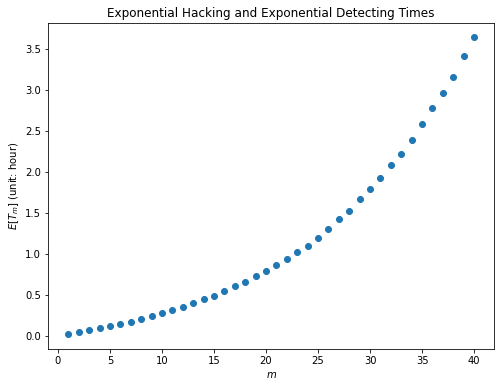

In [4]:
m = 40
eta = 0.02
alpha = 0.3
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m(m, eta, alpha))
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Exponential Hacking and Exponential Detecting Times')
plt.show()